### (1) 데이터 가져오기
- `sklearn.datasets`의 `load_diabetes`에서 데이터를 가져와주세요.
- `diabetes`의 `data`를 `df_X`에, `target`을 `df_y`에 저장해주세요.

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

## (2) 모델에 입력할 데이터 X 준비하기
- `df_X`에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [2]:
df_X, df_Y = diabetes.data, diabetes.target

In [3]:
import numpy as np

print(type(df_X))
print(df_X[:5])
print()
print(df_Y[:5])

<class 'numpy.ndarray'>
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]

[151.  75. 141. 206. 135.]


### (3) 모델에 예측할 데이터 y 준비하기
- `df_y`에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [4]:
print(type(df_Y))

<class 'numpy.ndarray'>


### (4) train 데이터와 test 데이터로 분리하기
- `X`와 `y` 데이터를 각각 `train` 데이터와 `test` 데이터로 분리해주세요.


In [5]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(df_X, df_Y, test_size=0.2)
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(353, 10)
(353,)
(89, 10)
(89,)


### (5) 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 `W`와 `b`를 준비해주세요.
- 모델 함수를 구현해주세요.


In [6]:
print(train_X.shape) # Feature의 갯수가 10개이므로, W = 10, b = 1
W = np.random.rand(10)
b = np.random.rand(1)

print(W.shape, b.shape)

(353, 10)
(10,) (1,)


In [7]:
# def model(x, w, b): # 단일 input model.
#     y = w * x + b 
#     return y
# 현재 Dataset이 한번에 연산되는 것을 원하므로, numpy의 dot product를 이용해 계산.
def model(X, W, b):
    return X @ W + b

### (6) 손실함수 loss 정의하기
- 손실함수를 MSE 함수로 정의해주세요.

In [8]:
def MSE(input, target):
    return ((input - target)**2).mean()

### (7) 기울기를 구하는 gradient 함수 구현하기
- 기울기를 계산하는 `gradient` 함수를 구현해주세요.

In [9]:
def gradient(X, W, b, y):
    # input Data의 갯수
    N = len(X)
    
    # Inference(model prediction 결과 도출)
    pred_y = model(X, W, b)
    
    # dW 계산. 1-9를 참고하면 쉽게 도출되는 것을 확인할 수 있음.
    dW = 1/N * 2 * X.T.dot(pred_y - y) 
    
    db = 2 * (pred_y - y).mean()
    
    return dW, db, pred_y

### (8) 하이퍼 파라미터인 학습률 설정하기
- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [10]:
lr = 0.1 # 변경하며 실험해보기

### (9) 모델 학습하기
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [11]:
epochs = 1000
loss_list = []


for i in range(1, epochs + 1):
    # inference(prediction 값 얻음)
    dW, db, pred_y = gradient(train_X, W, b, train_Y)
    
    W -= lr * dW
    b -= lr * db
    L = MSE(pred_y,train_Y)
    loss_list.append(L)
    if i % 10 == 0:
        print(f"{i} epochs are processing : Loss {L:0.4f}")

10 epochs are processing : Loss 6113.0562
20 epochs are processing : Loss 5649.8798
30 epochs are processing : Loss 5577.8001
40 epochs are processing : Loss 5512.2896
50 epochs are processing : Loss 5448.8462
60 epochs are processing : Loss 5387.3512
70 epochs are processing : Loss 5327.7387
80 epochs are processing : Loss 5269.9457
90 epochs are processing : Loss 5213.9115
100 epochs are processing : Loss 5159.5774
110 epochs are processing : Loss 5106.8865
120 epochs are processing : Loss 5055.7842
130 epochs are processing : Loss 5006.2175
140 epochs are processing : Loss 4958.1353
150 epochs are processing : Loss 4911.4885
160 epochs are processing : Loss 4866.2292
170 epochs are processing : Loss 4822.3116
180 epochs are processing : Loss 4779.6911
190 epochs are processing : Loss 4738.3249
200 epochs are processing : Loss 4698.1716
210 epochs are processing : Loss 4659.1912
220 epochs are processing : Loss 4621.3449
230 epochs are processing : Loss 4584.5955
240 epochs are proce

In [12]:
epochs = 1000
loss_list = []


for i in range(1, epochs + 1):
    # inference(prediction 값 얻음)
    dW, db, pred_y = gradient(train_X, W, b, train_Y)
    
    W -= lr * dW
    b -= lr * db
    L = MSE(pred_y,train_Y)
    loss_list.append(L)
    if i % 10 == 0:
        print(f"{i} epochs are processing : Loss {L:0.4f}")

10 epochs are processing : Loss 3381.3954
20 epochs are processing : Loss 3375.6010
30 epochs are processing : Loss 3369.9040
40 epochs are processing : Loss 3364.3018
50 epochs are processing : Loss 3358.7921
60 epochs are processing : Loss 3353.3725
70 epochs are processing : Loss 3348.0409
80 epochs are processing : Loss 3342.7951
90 epochs are processing : Loss 3337.6329
100 epochs are processing : Loss 3332.5525
110 epochs are processing : Loss 3327.5517
120 epochs are processing : Loss 3322.6288
130 epochs are processing : Loss 3317.7818
140 epochs are processing : Loss 3313.0089
150 epochs are processing : Loss 3308.3085
160 epochs are processing : Loss 3303.6788
170 epochs are processing : Loss 3299.1183
180 epochs are processing : Loss 3294.6252
190 epochs are processing : Loss 3290.1981
200 epochs are processing : Loss 3285.8355
210 epochs are processing : Loss 3281.5360
220 epochs are processing : Loss 3277.2981
230 epochs are processing : Loss 3273.1204
240 epochs are proce

### (10) test 데이터에 대한 성능 확인하기
- test 데이터에 대한 성능을 확인해주세요.
- (원래라면 평가 metric을 확인해야겠지만, loss를 이용해 근사하게 구현했음.)


In [13]:
test_dW, test_db, pred_test_y = gradient(test_X, W, b, test_Y)
test_L = MSE(pred_test_y,test_Y)
print(f"validation Loss : {test_L:0.4f}")

validation Loss : 3318.7058


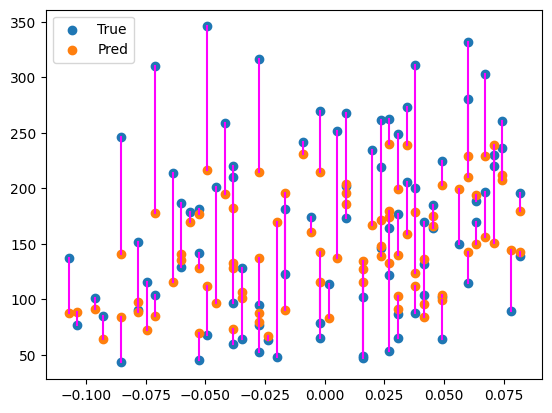

In [19]:
import matplotlib.pyplot as plt

target = test_Y
prediction = pred_test_y

# fig, ax = plt.subplot(figsize=(12, 5))
plt.scatter(test_X[:, 0], target, label="True")
plt.scatter(test_X[:, 0], prediction, label="Pred")
for x,y_1, y_2 in zip(test_X[:, 0], target, prediction):
    plt.plot([x, x], [y_1, y_2], color='magenta')
plt.legend()
plt.show()

